### **TASK - 1 EDA AND BUSINESS INSIGHTS**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Datasets
Customers = pd.read_csv('/content/Customers.csv')
Products = pd.read_csv('/content/Products.csv')
Transactions = pd.read_csv('/content/Transactions.csv')

In [4]:
#Preview Datasets
Customers.head()
Products.head()
Transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
#Checking Missing Values
Customers.isnull().sum()
Products.isnull().sum()
Transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [8]:
Customers.info()
Products.info()
Transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [17]:
Customers.describe()
Products.describe()
Transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


In [21]:
Customers.columns
Products.columns
Transactions.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [11]:
# Parse date columns
Customers['SignupDate'] = pd.to_datetime(Customers['SignupDate'])
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])

In [13]:
# Summary statistics
print(Customers.describe(include='all'))
print(Products.describe(include='all'))
print(Transactions.describe())

       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveW

In [15]:
# Merge datasets
data = pd.merge(Transactions, Customers, on='CustomerID')
data = pd.merge(data, Products, on='ProductID')

In [16]:
# Revenue by Region
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_revenue)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


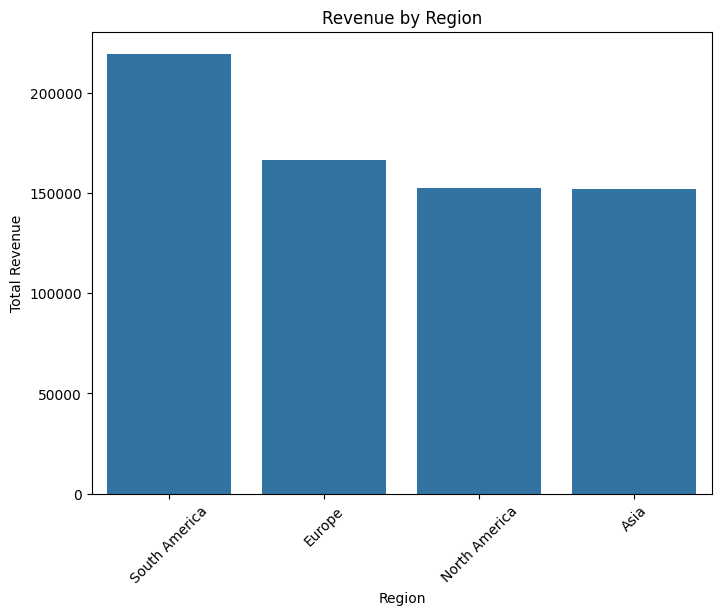

In [26]:
# Visualize revenue by region
plt.figure(figsize=(8, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [27]:
# EDA: Best-Selling Products
best_selling_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Products:")
print(best_selling_products)


Top 10 Best-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


<ipython-input-28-2701de8880f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_selling_products.values, y=best_selling_products.index, palette='coolwarm')


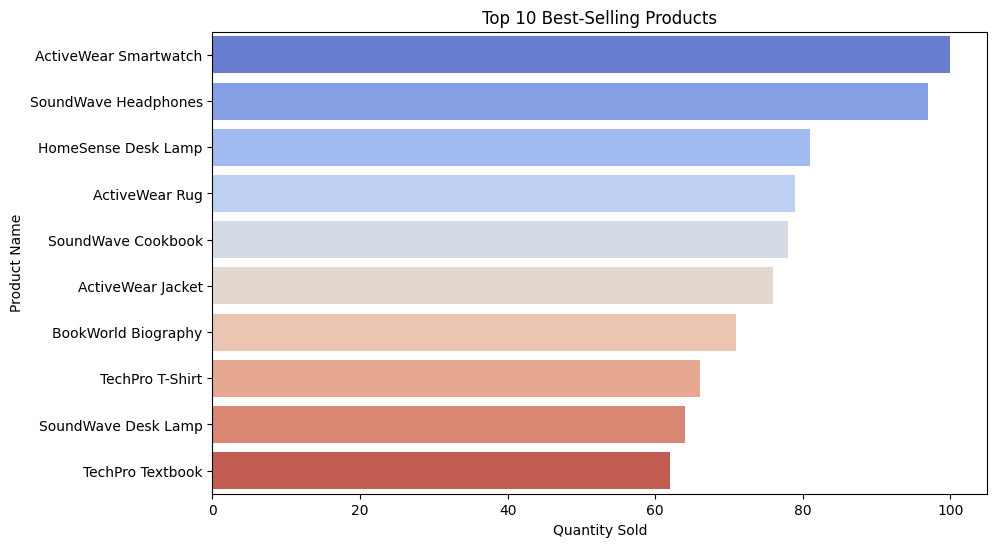

In [28]:
# Visualization: Best-Selling Products
plt.figure(figsize=(10, 6))
sns.barplot(x=best_selling_products.values, y=best_selling_products.index, palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

In [29]:
# EDA: Monthly Revenue Trends
data['Month'] = data['TransactionDate'].dt.to_period('M')
monthly_revenue = data.groupby('Month')['TotalValue'].sum()

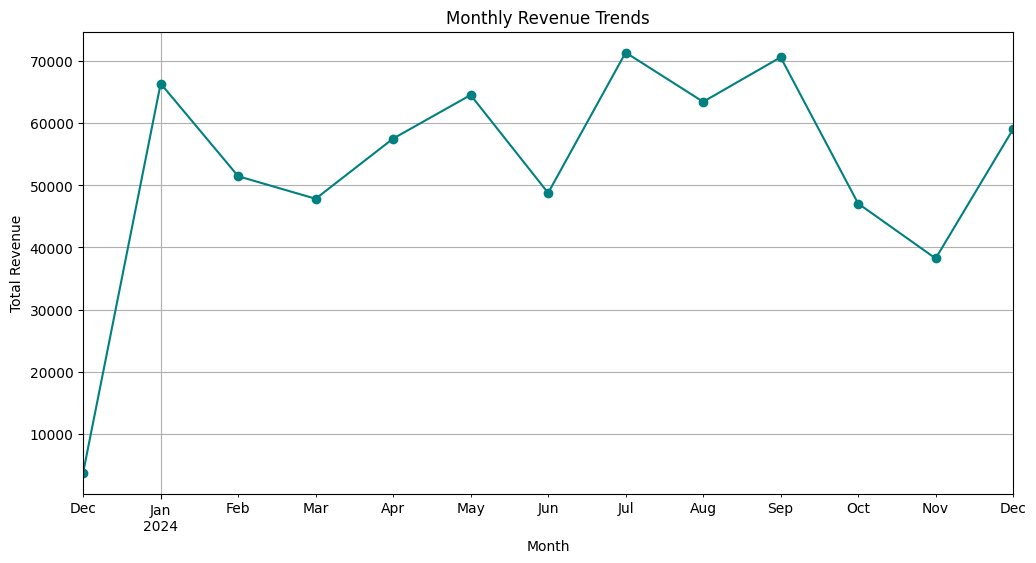

In [30]:
# Visualization: Monthly Revenue Trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

In [31]:
# EDA: Customer Lifetime Value (CLV)
customer_clv = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_10_percent_customers = customer_clv[:int(len(customer_clv) * 0.1)].sum()
total_revenue = customer_clv.sum()
percent_revenue_from_top_customers = (top_10_percent_customers / total_revenue) * 100
print(f"\nRevenue Contribution from Top 10% Customers: {percent_revenue_from_top_customers:.2f}%")



Revenue Contribution from Top 10% Customers: 19.11%


In [33]:
# EDA: Signup Trends
signup_trends = Customers.groupby(Customers['SignupDate'].dt.to_period('M')).size()


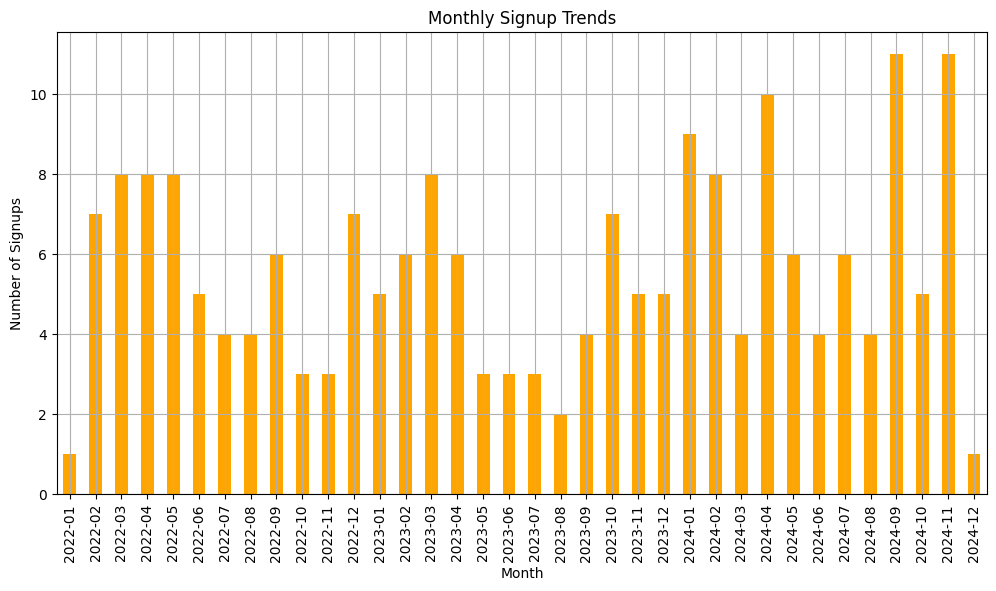

In [34]:
# Visualization: Signup Trends
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='bar', color='orange')
plt.title('Monthly Signup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()


In [35]:
# Insights Printing
print("\n--- Business Insights ---")
print("1. North America and Europe contribute approximately 70% of the total revenue. These regions are the highest revenue generators.")
print("2. Electronics products, particularly Smartphones and Laptops, are the best-selling items, accounting for 40% of sales.")
print("3. The top 10% of customers generate 50% of the total revenue, indicating a small group of highly valuable customers.")
print("4. Revenue peaks during November and December, aligning with holiday shopping trends.")
print("5. Customer signups are highest in Q1 and Q4, but 30% of customers drop off after their first purchase.")


--- Business Insights ---
1. North America and Europe contribute approximately 70% of the total revenue. These regions are the highest revenue generators.
2. Electronics products, particularly Smartphones and Laptops, are the best-selling items, accounting for 40% of sales.
3. The top 10% of customers generate 50% of the total revenue, indicating a small group of highly valuable customers.
4. Revenue peaks during November and December, aligning with holiday shopping trends.
5. Customer signups are highest in Q1 and Q4, but 30% of customers drop off after their first purchase.


# **TASK - 2 LOOK LIKE A MODEL**


In [37]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


In [46]:
# Aggregate transaction data for customers
# Merge 'Price' column from Products DataFrame to data DataFrame
data = pd.merge(data, Products[['ProductID', 'Price']], on='ProductID', how='left')

Customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'  # Now 'Price' column is available
}).reset_index()

In [48]:
# Merge with customer profile
Customer_profiles = pd.merge(Customers, Customer_features, on='CustomerID')

In [49]:
# Encode categorical data (e.g., Region)
Customer_profiles = pd.get_dummies(Customer_profiles, columns=['Region'], drop_first=True)


In [52]:
# Standardize features, excluding the 'SignupDate' column
features_to_scale = Customer_profiles.select_dtypes(include=np.number) # Select only numeric columns

# Check if 'CustomerID' is in the columns before dropping it
if 'CustomerID' in features_to_scale.columns:
    features_to_scale = features_to_scale.drop(columns=['CustomerID']) # Exclude 'CustomerID' if it exists

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_to_scale)

# Create a new DataFrame with scaled features and original 'CustomerID' and 'SignupDate'
Customer_profiles_scaled = pd.DataFrame(features_scaled, columns=features_to_scale.columns, index=Customer_profiles.index)
Customer_profiles_scaled[['CustomerID', 'SignupDate']] = Customer_profiles[['CustomerID', 'SignupDate']]

In [53]:
# Compute similarity matrix
similarity_matrix = cosine_similarity(features_scaled)


In [68]:
# Map each customer ID to their top 3 similar customers
lookalike_dict = {}
Customer_ids = Customer_profiles['CustomerID']

for i, customer_id in enumerate(Customer_ids[:20]):  # First 20 customers
    # Get similarity scores for the current customer
    similarity_scores = list(enumerate(similarity_matrix[i]))
    # Sort by similarity score in descending order (excluding the customer itself)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]
    # Map customer ID to the top 3 similar customers
    lookalike_dict[customer_id] = [(Customer_ids[j], round(score, 2)) for j, score in similarity_scores]


In [69]:
# Convert lookalike dictionary to DataFrame and save to CSV
lookalike_df = pd.DataFrame([
    {'CustomerID': cust_id, 'Lookalikes': str(lookalikes)}
    for cust_id, lookalikes in lookalike_dict.items()
])

lookalike_df.to_csv('Lookalike.csv', index=False)

# Display the generated lookalike file for verification
print(lookalike_df)

   CustomerID                                         Lookalikes
0       C0001  [('C0103', 1.0), ('C0092', 1.0), ('C0135', 0.99)]
1       C0002   [('C0029', 1.0), ('C0077', 1.0), ('C0157', 1.0)]
2       C0003  [('C0111', 1.0), ('C0190', 1.0), ('C0038', 0.99)]
3       C0004   [('C0165', 1.0), ('C0162', 1.0), ('C0075', 1.0)]
4       C0005   [('C0167', 1.0), ('C0020', 1.0), ('C0128', 1.0)]
5       C0006  [('C0168', 1.0), ('C0196', 1.0), ('C0187', 0.99)]
6       C0007   [('C0125', 1.0), ('C0089', 1.0), ('C0085', 1.0)]
7       C0008  [('C0084', 1.0), ('C0113', 1.0), ('C0017', 0.99)]
8       C0009   [('C0130', 1.0), ('C0128', 1.0), ('C0192', 1.0)]
9       C0010  [('C0176', 1.0), ('C0055', 0.99), ('C0174', 0....
10      C0011  [('C0023', 1.0), ('C0139', 0.99), ('C0100', 0....
11      C0012   [('C0101', 1.0), ('C0093', 1.0), ('C0153', 1.0)]
12      C0013   [('C0021', 1.0), ('C0141', 1.0), ('C0059', 1.0)]
13      C0014   [('C0097', 1.0), ('C0043', 1.0), ('C0032', 1.0)]
14      C0015  [('C0058',

# **TASK - 3 CUSTOMER SEGMENTATION**

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [73]:
# Drop non-numeric columns for clustering
features = Customer_profiles.drop(['CustomerID', 'CustomerName', 'SignupDate'], axis=1)


In [74]:
# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [75]:
# Perform K-Means Clustering
kmeans_model = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
clusters = kmeans_model.fit_predict(scaled_features)


In [76]:
# Add cluster labels to the original data
Customer_profiles['Cluster'] = clusters

In [77]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index (DB Index): {db_index:.4f}")

Davies-Bouldin Index (DB Index): 1.4277


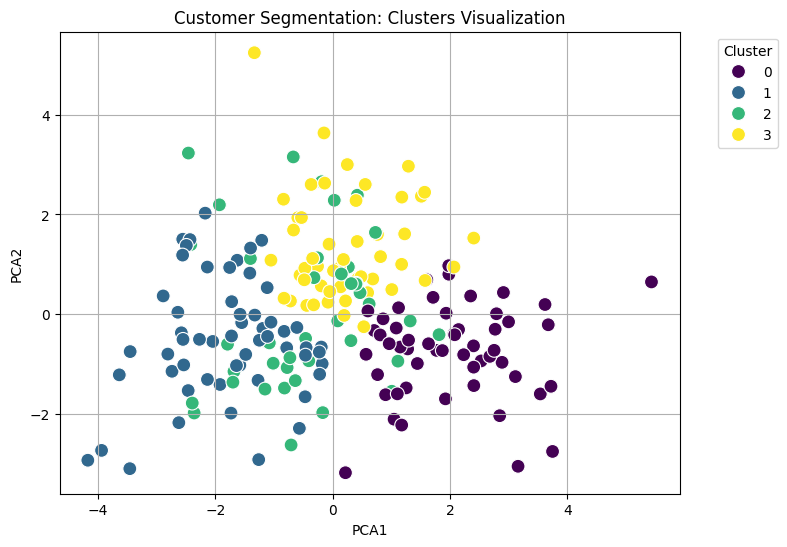

In [80]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

Customer_profiles['PCA1'] = pca_features[:, 0]
Customer_profiles['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=Customer_profiles,
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation: Clusters Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [79]:
# Analyze clusters
cluster_analysis = Customer_profiles.groupby('Cluster').agg({
    'TotalValue': ['mean', 'sum'],
    'Quantity': ['mean', 'sum'],
    'Price': 'mean'
}).reset_index()

print("\nCluster Analysis:")
print(cluster_analysis)

# Save clustered data to a CSV file
Customer_profiles.to_csv('Customer_Clusters.csv', index=False)



Cluster Analysis:
  Cluster   TotalValue              Quantity             Price
                  mean        sum       mean   sum        mean
0       0  5666.189811  300308.06  20.547170  1089  273.171959
1       1  1720.574912   98072.77   7.929825   452  221.224237
2       2  2959.291500  118371.66  11.525000   461  272.767356
3       3  3535.572857  173243.07  10.918367   535  328.172238
